In [75]:
import json

file = open('synthetic_dataset_with_time.txt', 'r')

text = file.read()

data = json.loads(text)

#the result is a Python dictionary:
#print(data['robot1'][0])

In [76]:
import emip_toolkit as EMTK

image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
#EMTK.draw_aoi(aoi, image, image_path)

file_path = "./"

# aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
# aois_with_tokens.head()

import correction

line_ys = correction.find_lines_Y(aoi)

In [77]:
import numpy as np
import drift_algorithms as algo
from tqdm import tqdm

#### Building simulation dataset with different types of error
Here I'm using the same reading trial but varying the factors of noise error generator, which inevitably leads to the training result to potentally only work on the sample of same trial.

In [126]:
def gen_error_sims(sample, n_sim, y_labels, d1, d2):
    x_train = np.zeros((n_sim, d1, d2))
    y_train = []
    
    for i in range (n_sim):
        error_type = random.choice(y)
        if error_type == 0: # noise
            error_trial = correction.error_noise(random.random(), random.randint(0, 50), random.random(), sample)
        elif error_type == 1: # shift
            line_ys = np.array(sample)[:, 1]
            error_trial = correction.error_shift(random.random(), line_ys, sample)
        else: # droop
            error_trial = correction.error_droop(random.uniform(0,5), sample)

        x_train[i] = error_trial
        y_train.append(error_type)
        
    return x_train, np.array(y_train)

In [152]:
sample = data['robot1'].copy()
x_train, y_train = gen_error_sims(sample, 300, y, 56, 3)
x_test, y_test = gen_error_sims(sample, 100, y, 56, 3)

#### NN Models

In [118]:
import tensorflow as tf

simple MLP to perform classification

In [195]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(56,3)),
    tf.keras.layers.Dense(3, activation="softmax")
])
model1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 168)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 507       
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [196]:
model1.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist1 = model1.fit(x_train, y_train, epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 67.0597 - accuracy: 0.2267
Epoch 2/200
10/10 [==============================] - 0s 955us/step - loss: 30.2917 - accuracy: 0.3000
Epoch 3/200
10/10 [==============================] - 0s 798us/step - loss: 25.5191 - accuracy: 0.2500
Epoch 4/200
10/10 [==============================] - 0s 897us/step - loss: 22.5928 - accuracy: 0.2200
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 21.3917 - accuracy: 0.2133
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 20.2650 - accuracy: 0.2567
Epoch 7/200
10/10 [==============================] - 0s 802us/step - loss: 20.1094 - accuracy: 0.1867
Epoch 8/200
10/10 [==============================] - 0s 997us/step - loss: 19.9162 - accuracy: 0.2400
Epoch 9/200
10/10 [==============================] - 0s 898us/step - loss: 23.0325 - accuracy: 0.2400
Epoch 10/200
10/10 [==============================] - 0s 997us/step - loss: 24.8967 - ac

10/10 [==============================] - 0s 698us/step - loss: 13.7299 - accuracy: 0.4633
Epoch 81/200
10/10 [==============================] - 0s 798us/step - loss: 9.8110 - accuracy: 0.5800
Epoch 82/200
10/10 [==============================] - 0s 901us/step - loss: 9.6083 - accuracy: 0.5133
Epoch 83/200
10/10 [==============================] - 0s 794us/step - loss: 9.3549 - accuracy: 0.5233
Epoch 84/200
10/10 [==============================] - 0s 898us/step - loss: 7.7300 - accuracy: 0.5467
Epoch 85/200
10/10 [==============================] - 0s 698us/step - loss: 6.8511 - accuracy: 0.6000
Epoch 86/200
10/10 [==============================] - 0s 798us/step - loss: 8.6909 - accuracy: 0.5433
Epoch 87/200
10/10 [==============================] - 0s 898us/step - loss: 7.6534 - accuracy: 0.5267
Epoch 88/200
10/10 [==============================] - 0s 900us/step - loss: 7.0069 - accuracy: 0.6000
Epoch 89/200
10/10 [==============================] - 0s 698us/step - loss: 6.5480 - accuracy:

10/10 [==============================] - 0s 801us/step - loss: 9.2808 - accuracy: 0.5267
Epoch 160/200
10/10 [==============================] - 0s 897us/step - loss: 18.4792 - accuracy: 0.4233
Epoch 161/200
10/10 [==============================] - 0s 698us/step - loss: 13.0877 - accuracy: 0.4967
Epoch 162/200
10/10 [==============================] - 0s 700us/step - loss: 8.2448 - accuracy: 0.5633
Epoch 163/200
10/10 [==============================] - 0s 897us/step - loss: 7.2116 - accuracy: 0.5933
Epoch 164/200
10/10 [==============================] - 0s 701us/step - loss: 8.2847 - accuracy: 0.5200
Epoch 165/200
10/10 [==============================] - 0s 798us/step - loss: 4.9324 - accuracy: 0.6367
Epoch 166/200
10/10 [==============================] - 0s 898us/step - loss: 5.3471 - accuracy: 0.6400
Epoch 167/200
10/10 [==============================] - 0s 698us/step - loss: 6.8477 - accuracy: 0.5433
Epoch 168/200
10/10 [==============================] - 0s 698us/step - loss: 6.8401 -

More layers

In [216]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(56,3)),
    tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax'),
])
model2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist2 = model2.fit(x_train, y_train, epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 898us/step - loss: 154.0763 - accuracy: 0.3333
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 55.2762 - accuracy: 0.3167
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 32.2076 - accuracy: 0.3100
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 32.6735 - accuracy: 0.2900
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 28.3892 - accuracy: 0.3233
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 29.3656 - accuracy: 0.3567
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 35.0505 - accuracy: 0.3400
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 36.5561 - accuracy: 0.3500
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 34.5303 - accuracy: 0.3800
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 22.4717 - accuracy: 0.3

10/10 [==============================] - 0s 997us/step - loss: 5.3429 - accuracy: 0.6267
Epoch 82/200
10/10 [==============================] - 0s 997us/step - loss: 10.4824 - accuracy: 0.5433
Epoch 83/200
10/10 [==============================] - 0s 898us/step - loss: 10.5523 - accuracy: 0.5533
Epoch 84/200
10/10 [==============================] - 0s 798us/step - loss: 6.1780 - accuracy: 0.6633
Epoch 85/200
10/10 [==============================] - 0s 997us/step - loss: 3.4252 - accuracy: 0.7267
Epoch 86/200
10/10 [==============================] - 0s 997us/step - loss: 2.8575 - accuracy: 0.7400
Epoch 87/200
10/10 [==============================] - 0s 698us/step - loss: 7.0194 - accuracy: 0.6233
Epoch 88/200
10/10 [==============================] - 0s 798us/step - loss: 6.5754 - accuracy: 0.6233
Epoch 89/200
10/10 [==============================] - 0s 997us/step - loss: 9.4605 - accuracy: 0.5333
Epoch 90/200
10/10 [==============================] - 0s 1ms/step - loss: 10.8943 - accuracy:

10/10 [==============================] - 0s 898us/step - loss: 11.4291 - accuracy: 0.5533
Epoch 162/200
10/10 [==============================] - 0s 898us/step - loss: 11.5084 - accuracy: 0.5867
Epoch 163/200
10/10 [==============================] - 0s 997us/step - loss: 7.3620 - accuracy: 0.6267
Epoch 164/200
10/10 [==============================] - 0s 1ms/step - loss: 5.9577 - accuracy: 0.7000
Epoch 165/200
10/10 [==============================] - 0s 997us/step - loss: 8.3923 - accuracy: 0.5733
Epoch 166/200
10/10 [==============================] - 0s 798us/step - loss: 10.4840 - accuracy: 0.6400
Epoch 167/200
10/10 [==============================] - 0s 898us/step - loss: 9.0924 - accuracy: 0.5900
Epoch 168/200
10/10 [==============================] - 0s 898us/step - loss: 5.2764 - accuracy: 0.6800
Epoch 169/200
10/10 [==============================] - 0s 898us/step - loss: 3.1338 - accuracy: 0.7200
Epoch 170/200
10/10 [==============================] - 0s 798us/step - loss: 2.7913 - 

Using CNN

In [225]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(56,3)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3, activation='softmax')
])
model3.compile( optimizer='adam',loss ='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist3 = model3.fit(x_train, y_train, epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 4ms/step - loss: 64.1897 - accuracy: 0.3333
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 33.3199 - accuracy: 0.3533
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 15.6721 - accuracy: 0.4033
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 10.5132 - accuracy: 0.4067
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 11.8813 - accuracy: 0.4367
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 7.5329 - accuracy: 0.4133
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 7.8611 - accuracy: 0.4733
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 14.6955 - accuracy: 0.3833
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 17.6232 - accuracy: 0.4367
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 13.2698 - accuracy: 0.4833
E

10/10 [==============================] - 0s 2ms/step - loss: 5.9479 - accuracy: 0.6833
Epoch 83/200
10/10 [==============================] - 0s 2ms/step - loss: 3.2069 - accuracy: 0.7200
Epoch 84/200
10/10 [==============================] - 0s 2ms/step - loss: 2.3066 - accuracy: 0.7467
Epoch 85/200
10/10 [==============================] - 0s 2ms/step - loss: 1.1113 - accuracy: 0.8600
Epoch 86/200
10/10 [==============================] - 0s 2ms/step - loss: 1.0795 - accuracy: 0.8467
Epoch 87/200
10/10 [==============================] - 0s 2ms/step - loss: 1.1919 - accuracy: 0.8100
Epoch 88/200
10/10 [==============================] - 0s 2ms/step - loss: 0.7565 - accuracy: 0.8233
Epoch 89/200
10/10 [==============================] - 0s 2ms/step - loss: 2.3811 - accuracy: 0.7400
Epoch 90/200
10/10 [==============================] - 0s 2ms/step - loss: 1.7384 - accuracy: 0.7767
Epoch 91/200
10/10 [==============================] - 0s 2ms/step - loss: 3.3094 - accuracy: 0.6733
Epoch 92/200


10/10 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.9400
Epoch 164/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.9067
Epoch 165/200
10/10 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.8833
Epoch 166/200
10/10 [==============================] - 0s 2ms/step - loss: 4.4653 - accuracy: 0.7033
Epoch 167/200
10/10 [==============================] - 0s 2ms/step - loss: 2.1907 - accuracy: 0.7900
Epoch 168/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4016 - accuracy: 0.8367
Epoch 169/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5770 - accuracy: 0.8200
Epoch 170/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5864 - accuracy: 0.7967
Epoch 171/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.9067
Epoch 172/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8900
Epoc

In [224]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(56,3)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])
model4.compile( optimizer='adam',loss ='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist4 = model4.fit(x_train, y_train, epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 3ms/step - loss: 172.7030 - accuracy: 0.3633
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 35.1771 - accuracy: 0.3700
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 43.3664 - accuracy: 0.3333
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 31.6450 - accuracy: 0.3700
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 14.3184 - accuracy: 0.4733
Epoch 6/200
10/10 [==============================] - 0s 3ms/step - loss: 6.3083 - accuracy: 0.5200
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 10.0223 - accuracy: 0.5667
Epoch 8/200
10/10 [==============================] - 0s 3ms/step - loss: 4.3409 - accuracy: 0.6000
Epoch 9/200
10/10 [==============================] - 0s 3ms/step - loss: 2.8515 - accuracy: 0.6567
Epoch 10/200
10/10 [==============================] - 0s 3ms/step - loss: 12.6824 - accuracy: 0.5100
E

10/10 [==============================] - 0s 2ms/step - loss: 1.5326 - accuracy: 0.8367
Epoch 83/200
10/10 [==============================] - 0s 2ms/step - loss: 2.3185 - accuracy: 0.8000
Epoch 84/200
10/10 [==============================] - 0s 3ms/step - loss: 6.2141 - accuracy: 0.6867
Epoch 85/200
10/10 [==============================] - 0s 2ms/step - loss: 3.9878 - accuracy: 0.7500
Epoch 86/200
10/10 [==============================] - 0s 2ms/step - loss: 3.1101 - accuracy: 0.7967
Epoch 87/200
10/10 [==============================] - 0s 3ms/step - loss: 1.9907 - accuracy: 0.8067
Epoch 88/200
10/10 [==============================] - 0s 2ms/step - loss: 3.6648 - accuracy: 0.7600
Epoch 89/200
10/10 [==============================] - 0s 2ms/step - loss: 3.2634 - accuracy: 0.7667
Epoch 90/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4731 - accuracy: 0.8433
Epoch 91/200
10/10 [==============================] - 0s 2ms/step - loss: 1.1113 - accuracy: 0.8367
Epoch 92/200


10/10 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.8800
Epoch 164/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.9133
Epoch 165/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.9300
Epoch 166/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.8933
Epoch 167/200
10/10 [==============================] - 0s 2ms/step - loss: 1.2453 - accuracy: 0.8500
Epoch 168/200
10/10 [==============================] - 0s 2ms/step - loss: 1.2470 - accuracy: 0.8400
Epoch 169/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8900
Epoch 170/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9233
Epoch 171/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9467
Epoch 172/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.9167
Epoc

Graphing the training accuracy

In [134]:
import matplotlib.pyplot as plt

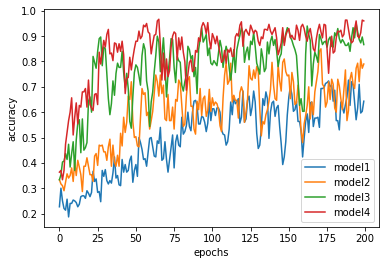

In [226]:
plt.plot(hist1.history["accuracy"], label="model1")
plt.plot(hist2.history["accuracy"], label="model2")
plt.plot(hist3.history["accuracy"], label="model3")
plt.plot(hist4.history["accuracy"], label="model4")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Evaluate the models on test sets

In [184]:
loss1, acc1 = model1.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 1.0981 - accuracy: 0.2400


In [155]:
loss2, acc2 = model2.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 7.3916 - accuracy: 0.6500


In [231]:
loss3, acc3 = model3.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 3.4186 - accuracy: 0.6900


In [227]:
loss4, acc4 = model4.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.1950 - accuracy: 0.9200


### Quick Summary & Reflection

So far the fixation trials with errors are simulated using the same reading trial to avoid the difference in array shapes (different trial has difference number of fixations, which can post a problem when generating an x input array and defining the input shape of the models). So the trained models should only be specific to this reading trial and lacks a wider range of application. A potential fix to this problem I could think of now is to only use the first (n) number of fixtions from different trial to avoid the problem with input shape. 

The error simulation generator randomly choses an error type for sample and randomizes on the factors of each error generator function. 300 samples were generated for the training set and 100 samples were generated for the test set. 

In total of 4 neural network models were experimented: 
- A 1-layer MLP with softmax as the activation function of the output layer
- A 2-layer MLP using Relu->softmax
- A CNN using Conv2D->softmax
- A deeper CNN uisng Conv2->relu->softmax

In the process, I also experimented using activation functions other than softmax (so relu or sigmoid) as the activation function of the output layer but the training accuracy is significantly lower (~30%). From the comparisons in both training accuracy and test accuracy, the inclusion of CNN significantly boosted up both accuracies, especially when a slightly deeper MLP is added after the convolution layer. Generally, a network with more layers improve the testing and training performance. 

The test accuracy of model 2-4 are all higher than the accuracy of random (which should be ~33%). The model 1 with only 1 layer has accuracy lower than random. To experiment if getting deeper with MLP is always better, I constructed a deeper network below where I added 2 more layers. The result from both training and testing shows a degrade in accuracy, which means going deeper in MLP does not really help. 

In [276]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(56,3)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='softmax'),
    tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])
model5.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist5 = model5.fit(x_train, y_train, epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 4ms/step - loss: 1.1020 - accuracy: 0.3433
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 1.0998 - accuracy: 0.3433
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 1.0984 - accuracy: 0.3367
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 1.0989 - accuracy: 0.3367
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 1.0991 - accuracy: 0.3233
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 1.0987 - accuracy: 0.2900
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 1.0985 - accuracy: 0.3367
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0987 - accuracy: 0.3367
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 1.0991 - accuracy: 0.3367
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 1.0987 - accuracy: 0.3367
Epoch 11/

10/10 [==============================] - 0s 1ms/step - loss: 1.0984 - accuracy: 0.3433
Epoch 83/200
10/10 [==============================] - 0s 2ms/step - loss: 1.0986 - accuracy: 0.3433
Epoch 84/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0987 - accuracy: 0.3433
Epoch 85/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0990 - accuracy: 0.3367
Epoch 86/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0986 - accuracy: 0.3233
Epoch 87/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0986 - accuracy: 0.3300
Epoch 88/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0986 - accuracy: 0.3300
Epoch 89/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0984 - accuracy: 0.2833
Epoch 90/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0986 - accuracy: 0.3167
Epoch 91/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0984 - accuracy: 0.3433
Epoch 92/200


10/10 [==============================] - 0s 1ms/step - loss: 1.0990 - accuracy: 0.3433
Epoch 164/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0983 - accuracy: 0.3433
Epoch 165/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0985 - accuracy: 0.3433
Epoch 166/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0985 - accuracy: 0.3433
Epoch 167/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0985 - accuracy: 0.3433
Epoch 168/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0984 - accuracy: 0.3433
Epoch 169/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0988 - accuracy: 0.2800
Epoch 170/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0996 - accuracy: 0.3167
Epoch 171/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0985 - accuracy: 0.3433
Epoch 172/200
10/10 [==============================] - 0s 1ms/step - loss: 1.0987 - accuracy: 0.3433
Epoc

In [241]:
loss5, acc5 = model5.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 1.1039 - accuracy: 0.2500


I also hope to recognize significant areas of shortcomings/potential for further exploration, mainly due to the fact that it is difficult to understand how neural networks actually work in the process, which makes it hard to find the best layer combinations. There as also a lot of variations (such as number of epochs, batch size, optimizer, order and combination of layers) to be controlled and tested on to come to a comprehensive result. 

###  Bigger models used in image classification

This section explores if models designed for image classification/recognition work on the fixation data, because the feature dimension of fixation data is the same as black and white images that are 56 x 3 in size and with only 1 color channel.

The problem of using transfer learning  is that most pre-trained models requires an input larger than 32x32, which is larger than the largest trial (robot0 contains 103 fixations but 103 x 3 < 32x32), so below I mainly present the outline of steps we can take to test this approach if we have a sample that contains enough fixation points. We would then need to stack "b&w" representation into a 3-channel image representation as per the input requirement of most trained network. 

In order to be able to customize the input shape, I looked at simpler models where I could replicate from scratch and referenced the study by Shima Alizadeh and Azar Fazel on CNN for facial expression recognition, where they showed a smaller network could achieve good accuracy as well in FER. I customized their network to accomendate the input shape of this dataset. Note that using models based on image processing is a completely exploration approach with high risk of underlying issues and is based on a lot of assumptions.

In [296]:
# transfer learning using MobileNetV2 - not working because not enough fixations to satisfy the "image size" requirement

x_train2D = x_train.reshape(300, 56, 3, 1)
x_test2D = x_test.reshape(100, 56, 3, 1)

model = tf.keras.applications.MobileNetV2(input_shape=x_train2D.shape[1:], include_top=False, weights='imagenet')
model.trainable = False

# adding the top classification layer
model_tl = tf.keras.Sequential(
    [
        model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=3, activation='softmax')
    ]
)
model_tl.summary()

model_tl.compile(optimizer=adam,
                 loss='SparseCategoricalCrossentropy',
                 metrics=['accuracy'])
loss_tl, acc_tl = model_tl.fit(train_x2D)

ValueError: The input must have 3 channels; got `input_shape=(56, 3, 1)`

In [300]:
# model Alizadeh and Fazel
from keras.layers import Conv1D, Activation, BatchNormalization, MaxPooling1D, Dropout, Dense, Flatten
from keras.models import Sequential

model_fe = Sequential()

model_fe.add(Conv1D(64, 3, padding='same', input_shape=(56,3)))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling1D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Conv1D(128, 3, padding='same'))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling1D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Conv1D(256, 3, padding='same'))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling1D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Conv1D(512, 3, padding='same'))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling1D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Flatten())

model_fe.add(Dense(512))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(Dropout(0.25))

model_fe.add(Dense(256))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(Dropout(0.25))

model_fe.add(Dense(3))
model_fe.add(Activation('softmax'))

In [301]:
y_train_oh = tf.keras.utils.to_categorical(y_train, 3)
y_test_oh = tf.keras.utils.to_categorical(y_test, 3)

model_fe.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])
hist_fe = model_fe.fit(x_train, y_train_oh, epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 38ms/step - loss: 1.4158 - accuracy: 0.3400
Epoch 2/200
10/10 [==============================] - 0s 39ms/step - loss: 1.4116 - accuracy: 0.3533
Epoch 3/200
10/10 [==============================] - 0s 38ms/step - loss: 1.3391 - accuracy: 0.4100
Epoch 4/200
10/10 [==============================] - 0s 38ms/step - loss: 1.2571 - accuracy: 0.4067
Epoch 5/200
10/10 [==============================] - 0s 36ms/step - loss: 1.1664 - accuracy: 0.4567
Epoch 6/200
10/10 [==============================] - 0s 35ms/step - loss: 1.1372 - accuracy: 0.4300
Epoch 7/200
10/10 [==============================] - 0s 34ms/step - loss: 1.1576 - accuracy: 0.4833
Epoch 8/200
10/10 [==============================] - 0s 35ms/step - loss: 1.1493 - accuracy: 0.4633
Epoch 9/200
10/10 [==============================] - 0s 36ms/step - loss: 1.0329 - accuracy: 0.4967
Epoch 10/200
10/10 [==============================] - 0s 34ms/step - loss: 1.0596 - accuracy: 0.5333

10/10 [==============================] - 0s 36ms/step - loss: 0.3216 - accuracy: 0.8600
Epoch 82/200
10/10 [==============================] - 0s 34ms/step - loss: 0.3030 - accuracy: 0.8833
Epoch 83/200
10/10 [==============================] - 0s 35ms/step - loss: 0.3018 - accuracy: 0.8600
Epoch 84/200
10/10 [==============================] - 0s 36ms/step - loss: 0.3395 - accuracy: 0.8567
Epoch 85/200
10/10 [==============================] - 0s 35ms/step - loss: 0.3257 - accuracy: 0.8600
Epoch 86/200
10/10 [==============================] - 0s 35ms/step - loss: 0.2908 - accuracy: 0.8867
Epoch 87/200
10/10 [==============================] - 0s 35ms/step - loss: 0.2508 - accuracy: 0.8967
Epoch 88/200
10/10 [==============================] - 0s 36ms/step - loss: 0.2767 - accuracy: 0.8767
Epoch 89/200
10/10 [==============================] - 0s 35ms/step - loss: 0.3065 - accuracy: 0.8700
Epoch 90/200
10/10 [==============================] - 0s 35ms/step - loss: 0.3131 - accuracy: 0.8600
Epo

10/10 [==============================] - 0s 35ms/step - loss: 0.1907 - accuracy: 0.9267
Epoch 162/200
10/10 [==============================] - 0s 37ms/step - loss: 0.1921 - accuracy: 0.9167
Epoch 163/200
10/10 [==============================] - 0s 38ms/step - loss: 0.1762 - accuracy: 0.9300
Epoch 164/200
10/10 [==============================] - 0s 38ms/step - loss: 0.2221 - accuracy: 0.9133
Epoch 165/200
10/10 [==============================] - 0s 38ms/step - loss: 0.1911 - accuracy: 0.9200
Epoch 166/200
10/10 [==============================] - 0s 39ms/step - loss: 0.1959 - accuracy: 0.9100
Epoch 167/200
10/10 [==============================] - 0s 39ms/step - loss: 0.1747 - accuracy: 0.9333
Epoch 168/200
10/10 [==============================] - 0s 38ms/step - loss: 0.1617 - accuracy: 0.9467
Epoch 169/200
10/10 [==============================] - 0s 39ms/step - loss: 0.2105 - accuracy: 0.9167
Epoch 170/200
10/10 [==============================] - 0s 38ms/step - loss: 0.2478 - accuracy: 0

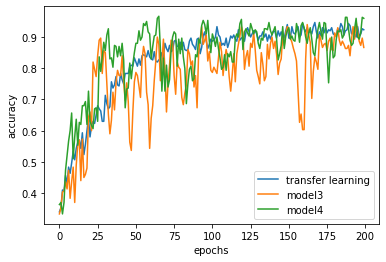

4/4 [==============================] - 0s 7ms/step - loss: 0.2426 - accuracy: 0.8700


In [308]:
plt.plot(hist_fe.history["accuracy"], label="transfer learning")
plt.plot(hist3.history["accuracy"], label="model3")
plt.plot(hist4.history["accuracy"], label="model4")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
loss_fe, acc_fe = model_fe.evaluate(x_test, y_test_oh)

Comparing with the two simple models that include convolutional layers, this model has a more stable performance in training accuracy once converged at about 50 epochs. The accuracy on testing data, however, is similar to that of model 4.